# Cleaning US Census Data 

This is a Jupyter Notebook in which I'll practice the skills learned in the Codecademy's course "How to clean data with Python".<br>
In this project I'll be <b>cleaning some US Census data, and creating interesting visualizations and insights from it.</b>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import glob

#### What do I have?

Let's look at the data that I have available. It's 10 csv files, each of them has the prefix <i>state</i> and a number ranging from 0 to 9 in their names. I'll look at one of them to see what info could be valuable to my project.

In [2]:
#Let's start with states0.csv
states0 = pd.read_csv('states0.csv')
states0.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


So, in this messy dataset, there is desaggregated data at the state level. There are variables like the total population, and the total population by gender in the variable called `GenderPop`. Also there is a variable named `Income` which, I guess, refers to the average income of the workers in that state. And last but not least, there is info about the ethnic composition of each state.

## Dealing with multiple files

I'll use the library `glob` to open multiple files. `glob` uses regular expressions to match the filenames.<br>
I loop through the filenames and store each one as a dataframe, later I append those dataframes in a previously created empty list <i>df_list</i>.<br>
Later on, I concatenate all df in the list into a single dataframe called `us_census`. `us_census` has 60 rows now. 

In [3]:
files = glob.glob('states*.csv')

df_list = []
for file in files:
  data = pd.read_csv(file)
  df_list.append(data)

us_census = pd.concat(df_list)

print(len(us_census))

60


Let's take a look at the datatypes of <i> us_census </i>.

In [4]:
us_census.dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

Most of them are <i>object</i> dtype. <br> 
Why could this happen? According to pandas documentation:
> If a pandas object contains data with multiple dtypes in a single column, the dtype of the column will be chosen to accommodate all of the data types (object is the most general)

If we look at the .head() of the dataframe we can see why is this. Except from the state column which is a string assigned as an object dtype, every other object-dtype-column has a mix of numbers and strings as values.<br>

In [5]:
us_census.head(10)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F
5,5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
0,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
1,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,$76146.5605875153,1751607M_1841615F
2,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,$61827.97663551402,448413M_478041F
3,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,$75466.36363636363,306674M_340810F


I'll have to clean this data converting each column to their correct type, to avoid any problems analyzing data later.

# Cleaning Data

### String Parsing

I want to convert the variable `Income` to a numeric dtype. In order to do that I have to remove the dollar sign using regular expressions.

In [6]:
us_census.Income = us_census['Income'].replace('[\$,]', '', regex = True)
#now data is ready to convert to a numeric dtype
us_census.Income = pd.to_numeric(us_census.Income)
#checking out
us_census.Income.dtypes

dtype('float64')

I also want to convert ethnic related variables to numeric. I'll identify their names, get rid of the `%` symbol, and then convert to numeric.

In [7]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

 Ethnic categories in data are 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific'

In [8]:
#a list with categories
categories = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

#loop through each category converting it to numeric
for category in categories:
    us_census[category] = us_census[category].replace('[%,]', '', regex = True)
    us_census[category] = pd.to_numeric(us_census[category])

#what are the dtypes now?
us_census.dtypes

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian         float64
Pacific       float64
Income        float64
GenderPop      object
dtype: object

All categories are now floats so work is ready.

### Splitting by character

When it comes to the variable `GenderPop`, I am going to separate this into two columns: `Women` and `Men`

In [9]:
gender_split = us_census.GenderPop.str.split('_')
#split saved into a new variable
gender_split.head(3)

0    [2341093M, 2489527F]
1      [384160M, 349215F]
2    [3299088M, 3342840F]
Name: GenderPop, dtype: object

In [10]:
#add the new columns to us_census dataset
us_census['Women'] = gender_split.str.get(1)
us_census['Men'] = gender_split.str.get(0)

us_census.head(3)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Women,Men
0,0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093M_2489527F,2489527F,2341093M
1,1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160M_349215F,349215F,384160M
2,2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088M_3342840F,3342840F,3299088M


Despite new columns are added, it's not everything done yet. I'd like to turn `Women` and `Men` into numeric variables too.

In [11]:
#Extract letters F and M respectively
us_census.Women = us_census['Women'].replace('[F,]', '', regex = True)
us_census.Men = us_census['Men'].replace('[M,]', '', regex = True)

#Convert to numeric
us_census.Women = pd.to_numeric(us_census.Women, errors = 'coerce') #there are some nan's so it's better to use 'coerce'
us_census.Men = pd.to_numeric(us_census.Men)

#print a mini .head()
us_census.head(3)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Women,Men
0,0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093M_2489527F,2489527.0,2341093
1,1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160M_349215F,349215.0,384160
2,2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088M_3342840F,3342840.0,3299088


### Handling Missing Values 

In [12]:
#this comprehension list returns column names in which there is at least one missing value
[col for col in us_census.columns if us_census[col].isnull().any()]

['Pacific', 'Women']

I'll try to replace missing values in the women's population with the difference between total population and men population. And those missing values in the Pacific colum with the difference between the total and the sum of all other categories.

In [13]:
filling_na_women = us_census.TotalPop - us_census.Men
filling_na_pacific = 100.0 - (us_census.Hispanic + us_census.White + us_census.Black + us_census.Native + us_census.Asian)
#filling  NAs with these variables' values 
us_census = us_census.fillna(value={'Women': filling_na_women,
                                   'Pacific': filling_na_pacific})

In [14]:
#checking again for missing values
[col for col in us_census.columns if us_census[col].isnull().any()]

[]

There isn't any missing value left, but we saw in the second print of `us_census` that there are duplicates.

### Dropping duplicates

In [16]:
#Let's see how many of them are
duplicates = us_census.State.duplicated()
duplicates.value_counts()

False    51
True      9
Name: State, dtype: int64

In [17]:
#Dropping duplicates (rows)
us_census = us_census.drop_duplicates(subset = ['State'])
#Re-checking
dup_check = us_census.State.duplicated()
dup_check.value_counts()

False    51
Name: State, dtype: int64

# Visualizations

### Average income in a state vs. proportion of women in that state

I want to see a scatterplot that shows average income in a state against the proportion of women in that state. Now I have to create the variable of the proportion of women in each state.

In [32]:
us_census.loc[:, 'prop_women'] = (us_census.Women / us_census.TotalPop) * 100 
us_census.prop_women.head(3)

0    51.536387
1    47.617522
2    50.329362
Name: prop_women, dtype: float64

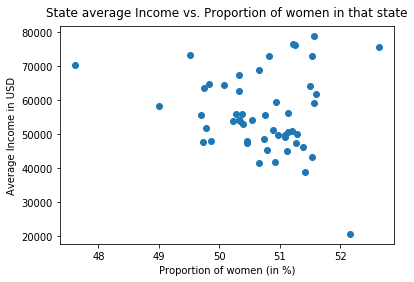

In [34]:
#using matplotlib to make a scatterplot
plt.scatter(us_census.prop_women, us_census.Income)
#formatting
plt.title('State average Income vs. Proportion of women in that state', pad=10.0)
plt.ylabel('Average Income in USD')
plt.xlabel('Proportion of women (in %)')

plt.show()

Most points fall around 50% and 52%. Maybe there is a very weak negative relationship. When proportion is higher income is lower. But we'll have to explore further with some analyisis which are outside the scope of this excercise.

### Histograms by ethnicity

I want to see an histogram for each ethnic group. This will help to understand more the distribution of the population.

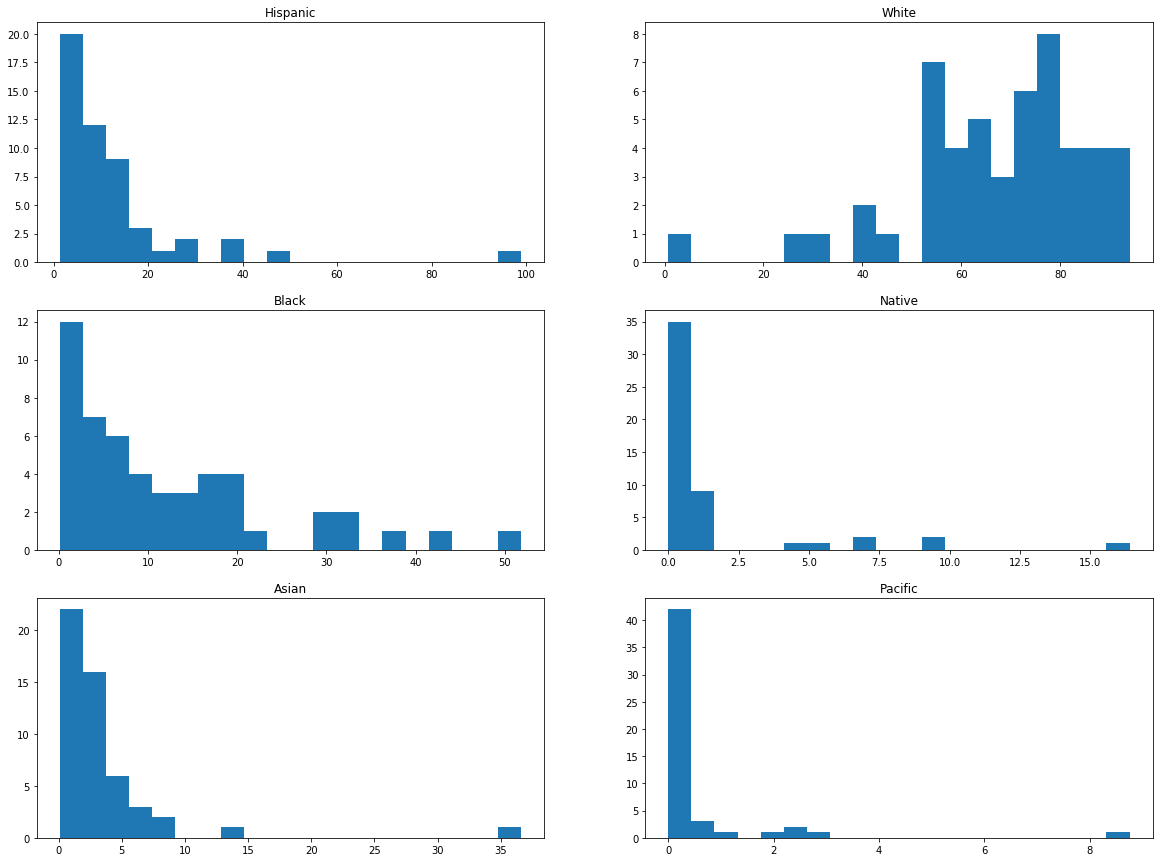

In [36]:
plt.figure(figsize=(20,15))

#Hispanic
plt.subplot(3, 2, 1)
plt.hist(us_census.Hispanic, bins=20)
plt.title('Hispanic')
#White
plt.subplot(3, 2, 2)
plt.hist(us_census.White, bins=20)
plt.title('White')
#Black
plt.subplot(3, 2, 3)
plt.hist(us_census.Black, bins=20)
plt.title('Black')
#Native
plt.subplot(3, 2, 4)
plt.hist(us_census.Native, bins=20)
plt.title('Native')
#Asian
plt.subplot(3, 2, 5)
plt.hist(us_census.Asian, bins=20)
plt.title('Asian')
#Pacific
plt.subplot(3, 2, 6)
plt.hist(us_census.Pacific, bins=20)
plt.title('Pacific')

plt.show()

Because of the concentration of blue bars in high percentages of the total population of each state in `White`, we could infer that in most states more than 50% of the population is White.<br>
Next, in order of representation are categories `Black` and `Hispanic`.

### Additional graph

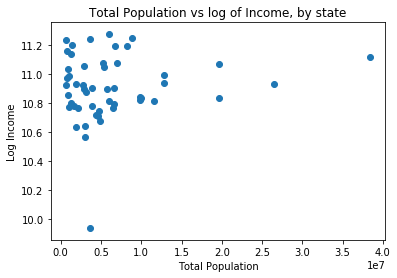

In [48]:
plt.scatter(us_census.TotalPop, np.log(us_census.Income))
plt.title('Total Population vs log of Income, by state')
plt.ylabel('Log Income')
plt.xlabel('Total Population')
plt.show()

There doesn't seem to be a clear pattern here. Maybe the average income of a state isn't related to the size of its population.